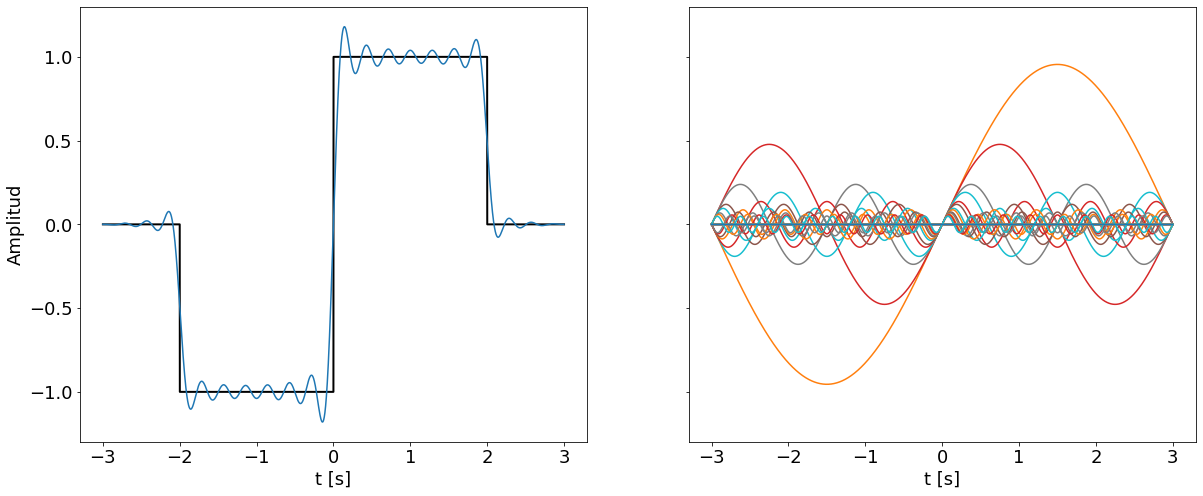

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from IPython.display import  Math

plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 18})

# Defino parámetros
dt = 0.0001 # Resolución del eje x
T = 6 # Periodo de la función
t = (T/2) * np.arange(-1+dt,1+dt,dt) # arreglo de espacio de tiempo 
n_coef=20# cantidad de coeficientes de Serie De Fourier a calcular
muestras=len(t)

# Defino la función
n_tramos=6 # Define la cantidad de tramos continuos
n_muestras_tramos = int(np.floor(muestras/n_tramos)) # Número de muestras por tramo
x = np.zeros_like(t) # Inicialmente defino toda la función en 0
x[n_muestras_tramos:3*n_muestras_tramos] =-1 # igualo a -1 el intervalo de t  [-2,0)
x[3*n_muestras_tramos:5*n_muestras_tramos] = 1 # igualo a 1 el intervalo de t  [0,2]

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.plot(t,x,'-',color='k',LineWidth=2)

# Parámetros del gráfico
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax1.set_prop_cycle(color=colors)

# Calculo los parámetros de la Serie de Fourier 
a_0 = np.sum(x) * dt # En este Caso a_0=0 (aproximo la integral con una suma)
xFS = a_0/2 # a_0/2 # Inicializo en 0 la la variable donde guardo la representación en Serie de Fourier de la señal

a = np.zeros(n_coef) # Inicializo los coeficientes que escalan los cosenos
b = np.zeros(n_coef) # Inicializo los coeficientes que escalan los senos

for n in range(n_coef): #
    a[n] = np.sum(x * np.cos((n+1)*(2*np.pi/T)*t)) * dt # 
    b[n] = np.sum(x * np.sin((n+1)*(2*np.pi/T)*t)) * dt
    xFS = xFS + b[n]* np.sin((n+1)*(2*np.pi/T)*t) + a[n] * np.cos((n+1)*(2*np.pi/T)*t) 
    ax2.plot(t, a[n] * np.cos((n+1)*(2*np.pi/T)*t),'-')
    ax2.plot(t, b[n] * np.sin((n+1)*(2*np.pi/T)*t),'-')
a_0_vec=np.zeros_like(t)
a_0_vec[:]=a_0/2
ax2.plot(t, a_0_vec,'-')
ax2.set_xlabel('t [s]')
ax1.plot(t,xFS,'-')
ax1.set_xlabel('t [s]')
ax1.set_ylabel('Amplitud')

print("")


<IPython.core.display.Math object>

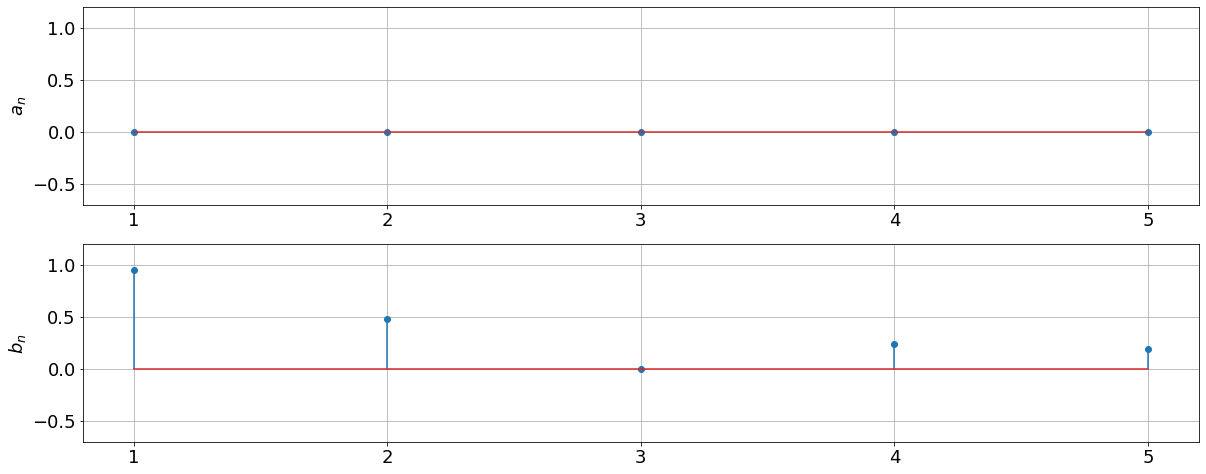

In [11]:
fig2,(ax3,ax4) = plt.subplots(2,1)

ax3.stem(range(1,n_coef+1,1),a, use_line_collection=True)
ax3.set_ylim([-0.7,1.2])
ax3.set_ylabel('$a_n$')
ax3.set_xticks(range(1,n_coef+1,1))
ax3.grid()
ax4.stem(range(1,n_coef+1,1),b, use_line_collection=True)
ax4.set_ylabel('$b_n$')
ax4.set_ylim([-0.7,1.2])
ax4.set_xticks(range(1,n_coef+1,1))
string_a_0="$a_0={}$".format(a_0)
display(Math(string_a_0)) 
ax4.grid()

Text(0, 0.5, 'Amplitud')

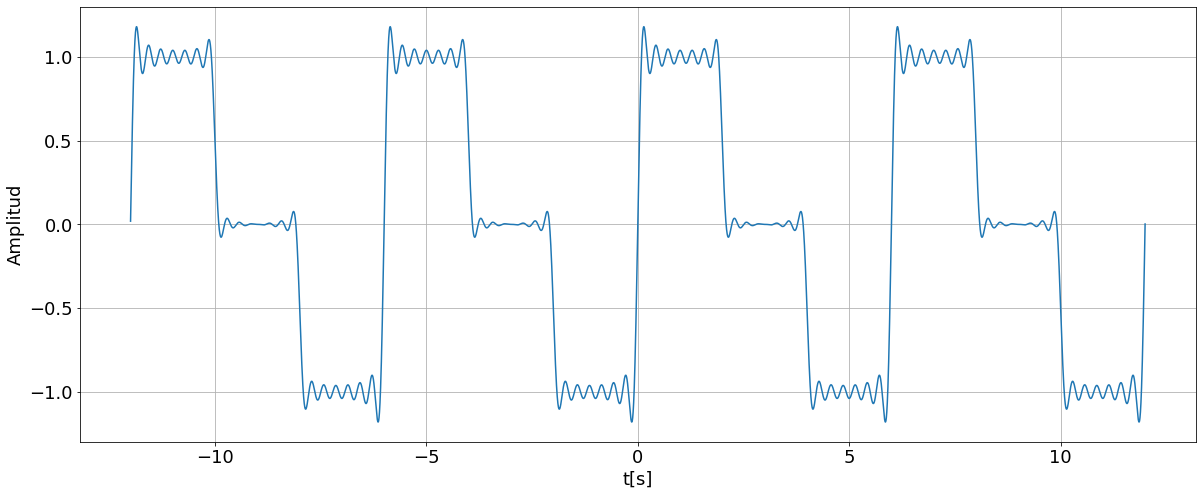

In [20]:
T2=4*T
dt2=0.01
t2 = (T2/2) * np.arange(-1+dt,1+dt,dt) # arreglo de espacio de tiempo 
xFS2=a_0/2
for n in range(n_coef): #
   xFS2 = xFS2 + b[n]* np.sin((n+1)*(2*np.pi/T)*t2) + a[n] * np.cos((n+1)*(2*np.pi/T)*t2) 
fig3, ax5 = plt.subplots()
ax5.plot(t2,xFS2)
ax5.grid()
ax5.set_xlabel('t [s]')
ax5.set_ylabel('Amplitud')